# ***Predictive Modelling In Time Series Forecasting***

### Introduction


### Business Understanding

Using the Zillow dataset, this project tackles a real-world challenge faced by real estate investment firms. The central problem revolves around strategically identifying the top 5 zip codes for investment, requiring a delicate balance between profitability and risk mitigation. The intricate dynamics of the real estate market underscore the significance of data-driven insights in guiding investment decisions.

The stakeholders encompass decision-makers, analysts, industry professionals, and organizations engaged in authentic investments. The identified challenge revolves around optimizing investment choices aligned with financial objectives.

Explicitly recognizing the stakeholders, we show how the project's results empower these individuals and firms to make informed decisions. The value proposition lies in the actionable insights derived from the time series analysis of the Zillow dataset. The conclusion precisely underscores the broader implications, highlighting the project's potential impact on investment firms' strategic decision-making processes.

### Problem Statement


#### Possible Solutions



### OBJECTIVES

The main objective is to identify the top 5 zip codes for real estate investment, considering potential return on investment, market stability, and future growth prospects.

#### Specific Objectives

1. Group zip codes by states to evaluate which regions exhibit the most promising real estate investment opportunities.

2. Objective: Identify and understand seasonal patterns influencing real estate prices in different zip codes.

3. Utilize time series modeling to forecast property values over the short term, medium term, and long term, aiming to identify the most favorable zip codes for investment.



<!-- ## ***Key Variables (Model Targets):***
- Price Appreciation: Growth in property values over time.
- Market Stability: Consistency in price trends, indicating lower risk.
- Demand Indicators: Factors influencing the desirability of the area (e.g., demographics, economic growth).
- Investment Return Potential: Estimated return based on historical and forecasted data.

## ***Data Source Identification:***

-Primary Source: Zillow Research dataset, providing historical real estate prices by zip code. -->


### ***Success Metrics:***
- Financial Returns: price appreciation percentage = atleast 20%
- Risk Assessment: Evaluate and limit the investment risk based on market stability.

In [2]:
#Necessary imports
import pandas as pd

In [3]:
#Data Loading and Inspection
# Loading the dataset
zillow_data = pd.read_csv('data/zillow_data.csv')
zillow_data.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


----------------------
# ***2.DATA ACQUISATION AND UNDERSTANDING***

The Zillow dataset provides detailed real estate data, with each row representing a unique zip code. Here's an overview of the dataset structure:

- RegionID: A unique identifier for each region.
- RegionName: The zip code for the region.
- City: The city where the region is located.
- State: The state where the region is located.
- Metro: The metropolitan area associated with the region.
- CountyName: The name of the county where the region is located.
- SizeRank: A ranking of the region based on size.
- Monthly Price Data: Starting from April 1996 to April 2018, this dataset includes monthly real estate prices for each zip code.


-***Primary Source***: Zillow Research dataset[!https://github.com/learn-co-curriculum/dsc-phase-4-choosing-a-dataset/blob/main/time-series/zillow_data.csv], providing historical real estate prices by zip code.

<!-- We'll analyze historical price trends at a zip code level, which is crucial for our objective of identifying the top 5 zip codes for real estate investment. The analysis will involve:

- Trend Analysis: Evaluating the long-term price trends in each zip code.
- Volatility Assessment: Understanding the stability or variability in prices over time.
- Comparative Analysis: Comparing zip codes across different regions, cities, or states.
- Forecasting: Applying statistical or machine learning models to predict future price trends. -->


In [5]:

def get_data_understanding(dataframe):
    # Basic information about the DataFrame
    info = dataframe.info()

    # Descriptive statistics for numeric columns
    description = dataframe.describe()

    # Checking for missing values in each column
    missing_values = dataframe.isnull().sum()

    return info, description, missing_values


# Now you can call this function with your DataFrame
info, description, missing_values = get_data_understanding(zillow_data)

# If you want to print the results
print("DataFrame Information:")
print(info)
print("\nDescriptive Statistics:")
print(description)
print("\nMissing Values:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB
DataFrame Information:
None

Descriptive Statistics:
            RegionID    RegionName      SizeRank       1996-04       1996-05  \
count   14723.000000  14723.000000  14723.000000  1.368400e+04  1.368400e+04   
mean    81075.010052  48222.348706   7362.000000  1.182991e+05  1.184190e+05   
std     31934.118525  29359.325439   4250.308342  8.600251e+04  8.615567e+04   
min     58196.000000   1001.000000      1.000000  1.130000e+04  1.150000e+04   
25%     67174.500000  22101.500000   3681.500000  6.880000e+04  6.890000e+04   
50%     78007.000000  46106.000000   7362.000000  9.950000e+04  9.950000e+04   
75%     90920.500000  75205.500000  11042.500000  1.432000e+05  1.433000e+05   
max    753844.000000  99901.000000  14723.000000  3.676700e+06  3.704200e+06   

            1996-06       1996-07       19

Converting data from wide to long format early in the data understanding phase will provide a solid foundation for subsequent analyses. 

It aids in uncovering initial insights, identifying data quality issues, and aligning the data structure with the goals of the analysis. This proactive approach ensures a smoother transition into the data preparation phase and subsequent modeling or decision-making processes.

### Data Preparation

In [3]:
#Data reshaping 
# Melting the DataFrame from wide to long format
df = pd.melt(
        zillow_data,
        id_vars=['RegionID', 'RegionName', 'City', 'State', 'Metro', 'CountyName', 'SizeRank'],
        var_name='Date',
        value_name='Price'
    )

# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m')

# # Sorting the data by 'Date'
df= df.sort_values(by=['Date'])

# # Set the 'Date' column as the index of the DataFrame
# df.set_index('Date', inplace=True)
# Assuming 'df' is your DataFrame



# Display the first few rows to confirm the index is set
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,Date,Price
0,84654,60657,Chicago,IL,Chicago,Cook,1,1996-04-01,334200.0
9809,63186,13624,Clayton,NY,Watertown,Jefferson,9810,1996-04-01,56400.0
9810,77596,45335,Jamestown,OH,Dayton,Greene,9811,1996-04-01,NaN
9811,60795,7755,Ocean,NJ,New York,Monmouth,9812,1996-04-01,163700.0
9812,74415,37681,Limestone,TN,Johnson City,Washington,9813,1996-04-01,47200.0
...,...,...,...,...,...,...,...,...,...
3891783,67309,22556,Stafford,VA,Washington,Stafford,4912,2018-04-01,332700.0
3891784,72802,33761,Clearwater,FL,Tampa,Pinellas,4913,2018-04-01,334500.0
3891785,74730,38242,Paris,TN,Paris,Henry,4914,2018-04-01,90900.0
3891787,88803,70785,Walker,LA,Baton Rouge,Livingston,4916,2018-04-01,158400.0


In [4]:

def get_data_understanding(dataframe):
    # Basic information about the DataFrame
    info = dataframe.info()

    # Descriptive statistics for numeric columns
    description = dataframe.describe()

    # Checking for missing values in each column
    missing_values = dataframe.isnull().sum()

    return info, description, missing_values


# Now you can call this function with your DataFrame
info, description, missing_values = get_data_understanding(df)

# If you want to print the results
print("DataFrame Information:")
print(info)
print("\nDescriptive Statistics:")
print(description)
print("\nMissing Values:")
print(missing_values)



<class 'pandas.core.frame.DataFrame'>
Index: 3901595 entries, 0 to 3901594
Data columns (total 9 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   RegionName  int64         
 2   City        object        
 3   State       object        
 4   Metro       object        
 5   CountyName  object        
 6   SizeRank    int64         
 7   Date        datetime64[ns]
 8   Price       float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 297.7+ MB
DataFrame Information:
None

Descriptive Statistics:
           RegionID    RegionName      SizeRank  \
count  3.901595e+06  3.901595e+06  3.901595e+06   
mean   8.107501e+04  4.822235e+04  7.362000e+03   
min    5.819600e+04  1.001000e+03  1.000000e+00   
25%    6.717400e+04  2.210100e+04  3.681000e+03   
50%    7.800700e+04  4.610600e+04  7.362000e+03   
75%    9.092100e+04  7.520600e+04  1.104300e+04   
max    7.538440e+05  9.990100e+04  1.472300e+04 

Here's an overview of the reshaped data:

- ***Data Structure:*** Each row now contains the RegionID, RegionName (zip code), City, State, Metro, CountyName, SizeRank, the Date of the record, and the corresponding Price.

- ***Data Types:*** The Date column has been converted to a datetime type, which is essential for time series analysis. Other columns are appropriately typed (numerical or object).

- ***Missing Values:*** There are missing values in the Metro and Price columns. The missing Metro values may not significantly impact the analysis, as we have other location identifiers like City, State, and CountyName. However, the missing Price values are crucial and need to be addressed.

Next steps in data preprocessing:

- ***Handling Missing Values in Price:*** We need to decide how to handle these missing values. Options include imputation (if the missingness is random and not extensive), or exclusion of records with missing prices. The choice depends on the extent and nature of the missing data.

- ***Exploratory Data Analysis (EDA):*** Before diving into modeling, an exploratory analysis to understand the trends and characteristics of the data is crucial. This will include analyzing price trends over time, price distributions across different regions, and any other relevant factors.

- ***Feature Engineering:*** Based on the EDA, we might identify additional features that could be useful for the analysis, such as indicators for economic cycles, seasonality effects, or regional economic indicators.

- ***Model Selection and Forecasting:*** Once the data is preprocessed, we can select appropriate time series forecasting models to predict future real estate prices.

- ***Evaluation and Selection of Top Zip Codes:*** Using the model's forecasts and possibly other economic indicators, we'll evaluate and rank the zip codes based on their potential for investment.

Given the nature of the Zillow dataset and the objective of forecasting real estate prices to identify the best zip codes for investment, the approach to handling missing values and the decision on whether to format the data for time series analysis first are interconnected. Here's an outline of our approach:

1. **Understanding Missing Values in Price Data**:
   - **Nature of Missingness**: Determine if the missing values are random or systematic. If the missingness is systematic (e.g., missing for specific time periods or specific regions), this could indicate data collection issues or absence of data for newer markets.
   - **Percentage of Missingness**: Assess the proportion of missing data. A high percentage of missing data in certain zip codes might lead to unreliable forecasts for those areas.

2. **Approaches to Handle Missing Values**:
   - **Imputation**: If the missingness is random and not extensive, imputation techniques can be used. Advanced machine learning techniques like K-Nearest Neighbors (KNN) or time series specific methods (like linear interpolation or seasonal decomposition) can be applied.
   - **Exclusion**: If the missingness is extensive or systematic, it might be better to exclude those zip codes from the analysis to avoid introducing bias.

3. **Preparing for Time Series Analysis**:
   - **Time Series Formatting**:This includes setting the date as an index and ensuring that the data is sorted chronologically.
   - **Handling Missing Dates**: If there are missing dates (time points) in the series, they should be identified. Techniques like forward-filling, backward-filling, or interpolation can be used depending on the nature of the data.

4. **Exploratory Data Analysis (EDA)**:
   - Before delving into modeling, conducting EDA is crucial to understand the underlying patterns, trends, and anomalies in the data.



## Handling Missing Values for Time Series Analysis

Given the objectives of the study, we need to handle missing values in a way that preserves the temporal structure of the data and allows for accurate seasonal and trend analysis. Below are the recommended steps for handling missing values in the 'Price' and 'Metro' columns:

### Price Column Imputation

Since 'Price' is a critical variable for time series analysis, we will use interpolation to fill in missing values. This method respects the time series structure and maintains the integrity of trends and seasonality.


In [5]:
# Create a new DataFrame indicating where the missing values are
missing_indicator = df.isnull()

# Check if rows with missing 'Price' also have missing 'Metro'
relationship = missing_indicator['Price'] & missing_indicator['Metro']

# Calculate the number of rows where both 'Price' and 'Metro' are missing
both_missing = relationship.sum()

# Calculate the total number of missing values for 'Price' and 'Metro'
total_missing_price = missing_indicator['Price'].sum()
total_missing_metro = missing_indicator['Metro'].sum()

# Print the results
print(f"Number of rows with both 'Price' and 'Metro' missing: {both_missing}")
print(f"Total number of missing values in 'Price': {total_missing_price}")
print(f"Total number of missing values in 'Metro': {total_missing_metro}")

# Calculate the percentage of missing 'Price' where 'Metro' is also missing
percentage = (both_missing / total_missing_price) * 100
print(
    f"Percentage of missing 'Price' values where 'Metro' is also missing: {percentage:.2f}%")

Number of rows with both 'Price' and 'Metro' missing: 40372
Total number of missing values in 'Price': 156891
Total number of missing values in 'Metro': 276395
Percentage of missing 'Price' values where 'Metro' is also missing: 25.73%


In [6]:
# Analyzing the extent of missing Price values and their nature
missing_price_data = df[df['Price'].isna()]

# Checking if missing values are random or systematic
# 1. Checking the distribution of missing values over time
missing_over_time = missing_price_data['Date'].dt.year.value_counts().sort_index()

# 2. Checking the distribution of missing values across different zip codes
missing_by_zip = missing_price_data['RegionName'].value_counts()

missing_over_time_summary = missing_over_time.describe()
missing_by_zip_summary = missing_by_zip.describe()

missing_over_time_summary


count       19.000000
mean      8257.421053
std       4138.164023
min        336.000000
25%       5702.000000
50%       9170.000000
75%      12432.000000
max      12462.000000
Name: count, dtype: float64

In [7]:
missing_by_zip_summary

count    1039.000000
mean      151.001925
std        43.712452
min        15.000000
25%       111.000000
50%       167.000000
75%       183.000000
max       219.000000
Name: count, dtype: float64

In [8]:
missing_over_time.head()

Date
1996     9351
1997    12462
1998    12432
1999    12432
2000    12432
Name: count, dtype: int64

1. Distribution of Missing Values Over Time:

The missing values in the 'Price' column are summarized by the year, indicating the count of missing values for each year. The results show the count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.

For example, in the provided output, there were 9351 missing values in 1996, 12462 in 1997, and so on.

In [9]:
missing_by_zip.head()

RegionName
73173    219
45872    219
35824    219
39202    219
54230    219
Name: count, dtype: int64



The analysis of missing values in the `Price` column reveals the following:

1. **Missing Values Over Time**:
   - The missing values are spread across 19 years (1996-2014).
   - There's a high variation in the number of missing values per year, with some years having significantly more missing values than others. This indicates that missingness might be systematic to certain time periods.

2. **Missing Values Across Zip Codes**:
   - The missing values are spread across 1,039 different zip codes.
   - There's also variation in the number of missing values per zip code. Some zip codes have more missing data, indicating that certain areas might have more incomplete records.

Given these observations, the approach to handle missing values could be as follows:

- **Imputation for Random Missingness**: For zip codes with a relatively low number of missing values, imputation might be a suitable approach. Techniques like linear interpolation or time series specific methods (like seasonal decomposition) can be used, as they can account for the temporal nature of the data.

- **Exclusion for Systematic Missingness**: For years or zip codes with a high number of missing values, it might be better to exclude those records. This is especially true for zip codes with missing values across a significant portion of the time series, as imputation in such cases might introduce bias.

Before proceeding with imputation or exclusion, it's also essential to format the data correctly for time series analysis:

- **Time Series Formatting**: Ensure each time series (each zip code) is in chronological order and set the date as an index. This will facilitate further time series specific processing and analysis.

- **Handling Missing Dates**: If there are entire missing dates (time points) in the series, decide on a strategy to handle these, such as forward-filling, backward-filling, or interpolation.



In [21]:
# Assuming df is your DataFrame

# Handle missing values in 'Price' using mean or median
# df['Price'].fillna(df['Price'].median(), inplace=True)

# Assuming df is your DataFrame and 'Date' is already in datetime format and set as the index

# Group by 'RegionID' and interpolate missing 'Price' values within each group
df['Price'] = df.groupby('RegionID')['Price'].transform(
    lambda group: group.interpolate(method='linear', limit_direction='both'))

# Then fill any remaining missing 'Price' values with the median
# df['Price'].fillna(df['Price'].median(), inplace=True)

# No need to reset the index if 'Date' is already set as the index and you want to keep it that way

In [22]:
#dealing with the missing values in metro
# Calculate the percentage of null values in the 'Metro' column
percentage_missing_metro = df['Metro'].isnull().mean() * 100

# Print the result
print(
    f"Percentage of missing values in 'Metro': {percentage_missing_metro:.2f}%")

Percentage of missing values in 'Metro': 0.00%


In [23]:
df['Metro'].fillna('Unknown', inplace=True)

# df.dropna(subset=['Metro'], inplace=True)
df.Metro.value_counts(normalize=True)


Metro
Unknown                           0.070842
New York                          0.052910
Los Angeles-Long Beach-Anaheim    0.023569
Chicago                           0.022074
Philadelphia                      0.019086
                                    ...   
Salina                            0.000068
Starkville                        0.000068
Eagle Pass                        0.000068
Paragould                         0.000068
The Dalles                        0.000068
Name: proportion, Length: 702, dtype: float64

In [24]:
df

RegionName        City State         Metro  CountyName  \
Date       RegionID                                                           
1996-04-01 84654          60657     Chicago    IL       Chicago        Cook   
           63186          13624     Clayton    NY     Watertown   Jefferson   
           77596          45335   Jamestown    OH        Dayton      Greene   
           60795           7755       Ocean    NJ      New York    Monmouth   
           74415          37681   Limestone    TN  Johnson City  Washington   
...                         ...         ...   ...           ...         ...   
2018-04-01 67309          22556    Stafford    VA    Washington    Stafford   
           72802          33761  Clearwater    FL         Tampa    Pinellas   
           74730          38242       Paris    TN         Paris       Henry   
           88803          70785      Walker    LA   Baton Rouge  Livingston   
           95851          89155    Mesquite    NV     Las Vegas       Clark   

                     SizeRank     Price  
Date       RegionID                      
1996-04-01 84654            1  334200.0  
           63186         9810   56400.0  
           77596         9811  131000.0  
           60795         9812  163700.0  
           74415         9813   47200.0  
...                       ...       ...  
2018-04-01 67309         4912  332700.0  
           72802         4913  334500.0  
           74730         4914   90900.0  
           88803         4916  158400.0  
           95851        14723  357200.0  

[3901595 rows x 7 columns]

In [25]:

def get_data_understanding(dataframe):
    # Basic information about the DataFrame
    info = dataframe.info()

    # Descriptive statistics for numeric columns
    description = dataframe.describe()

    # Checking for missing values in each column
    missing_values = dataframe.isnull().sum()

    return info, description, missing_values


# Now you can call this function with your DataFrame
info, description, missing_values = get_data_understanding(df)

# If you want to print the results
print("DataFrame Information:")
print(info)
print("\nDescriptive Statistics:")
print(description)
print("\nMissing Values:")
print(missing_values)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3901595 entries, (Timestamp('1996-04-01 00:00:00'), 84654) to (Timestamp('2018-04-01 00:00:00'), 95851)
Data columns (total 7 columns):
 #   Column      Dtype  
---  ------      -----  
 0   RegionName  int64  
 1   City        object 
 2   State       object 
 3   Metro       object 
 4   CountyName  object 
 5   SizeRank    int64  
 6   Price       float64
dtypes: float64(1), int64(2), object(4)
memory usage: 223.9+ MB
DataFrame Information:
None

Descriptive Statistics:
         RegionName      SizeRank         Price
count  3.901595e+06  3.901595e+06  3.901595e+06
mean   4.822235e+04  7.362000e+03  2.051873e+05
std    2.935833e+04  4.250165e+03  2.485354e+05
min    1.001000e+03  1.000000e+00  1.130000e+04
25%    2.210100e+04  3.681000e+03  9.620000e+04
50%    4.610600e+04  7.362000e+03  1.452000e+05
75%    7.520600e+04  1.104300e+04  2.331000e+05
max    9.990100e+04  1.472300e+04  1.931490e+07

Missing Values:
RegionName    0
City   

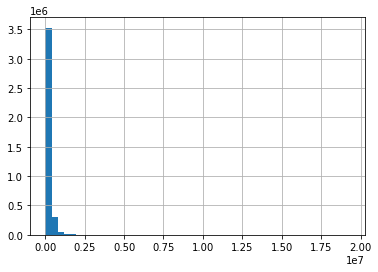

In [29]:
df['Price'].hist(bins="auto")
plt.show()

In [30]:
df.set_index('Date')['Price'].plot()
plt.show()

KeyError: "None of ['Date'] are in the columns"